In [1]:
!pip install requests 

import warnings
warnings.filterwarnings('ignore')

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')


import certifi

print(certifi.where())

SSL_CERT_FILE = '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/certifi/cacert.pem'

import certifi
import requests

try:
    print('Checking connection to Github...')
    test = requests.get('https://api.github.com')
    print('Connection to Github OK.')
except requests.exceptions.SSLError as err:
    print('SSL Error. Adding custom certs to Certifi store...')
    cafile = certifi.where()
    with open('certicate.pem', 'rb') as infile:
        customca = infile.read()
    with open(cafile, 'ab') as outfile:
        outfile.write(customca)
    print('That might have worked.')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/certifi/cacert.pem
Checking connection to Github...
Connection to Github OK.


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

videojuegos= pd.read_csv('vgsales.csv') 
print(videojuegos.isnull().sum(), videojuegos.shape)
videojuegos = videojuegos.dropna()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64 (16598, 11)


# Análisis Exploratorio de Datos en relación a las ventas de videojuegos desde 1980 hasta 2017.

## Juegos ordenados en base a sus ventas globales. 

Como podemos ver en la tabla, los videojuegos más vendidos históricamente son los videojuegos que pertenecen a Nintendo. 

In [4]:
videojuegos_51 = videojuegos.sort_values(by=['Global_Sales','Rank'], ascending=False)
videojuegos_51

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
15984,15987,Chameleon: To Dye For!,DS,2006.0,Puzzle,505 Games,0.01,0.00,0.00,0.00,0.01
15983,15986,Dragon Zakura DS,DS,2007.0,Misc,Electronic Arts,0.00,0.00,0.01,0.00,0.01
15982,15985,Super Battle For Money Sentouchuu: Kyuukyoku n...,3DS,2016.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
15981,15984,Coven and Labyrinth of Refrain,PSV,2016.0,Action,Nippon Ichi Software,0.00,0.00,0.01,0.00,0.01


Sin embargo, si hacemos esta misma tabla, pero ordenada por años en lugar de por ventas, vemos que los primeros años en la industria de los videojuegos no fueron para nada rentables economicamente hablando. Y los últimos años tampoco es que sean excesivamente bollantes para la gran mayoría de titulos que salen al mercado.

In [5]:
videojuegos = videojuegos.sort_values(by='Year', ascending=True)
videojuegos= videojuegos[['Year', 'Rank', 'Name', 'Platform','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
display(videojuegos.head())
display(videojuegos.tail())

,Year,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,1980.0,259,Asteroids,2600,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
6317,1980.0,6319,Bridge,2600,Misc,Activision,0.25,0.02,0.0,0.00,0.27
1969,1980.0,1971,Defender,2600,Misc,Atari,0.99,0.05,0.0,0.01,1.05
5366,1980.0,5368,Freeway,2600,Action,Activision,0.32,0.02,0.0,0.00,0.34
1766,1980.0,1768,Kaboom!,2600,Misc,Activision,1.07,0.07,0.0,0.01,1.15


,Year,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5288,2016.0,5290,Star Fox: Zero,WiiU,Shooter,Nintendo,0.16,0.1,0.07,0.03,0.35
14390,2017.0,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16438,2017.0,16441,Brothers Conflict: Precious Baby,PSV,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01
16241,2017.0,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
5957,2020.0,5959,Imagine: Makeup Artist,DS,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29


## Correlación entre variables 

Como paso previo a la visualización de los distintos datos que nos proporcionará este estudio, lo primero será echar una primer vistazo a la correlación existente entre las diferentes variables que conforman nuestra base de datos.

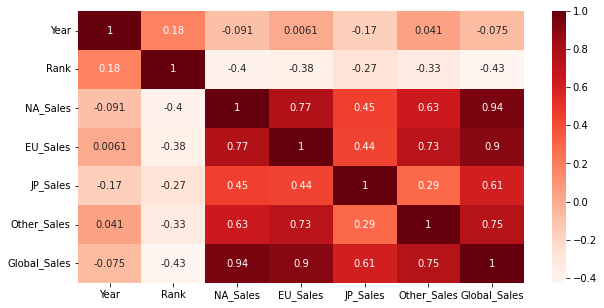

In [6]:
correlacion= videojuegos.corr()

fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(correlacion,annot=True, cmap= 'Reds')
plt.show()


Como se puede observar, existe una gran correlación entre las ventas de las diferentes zonas geográficas y las ventas globales, dando lugar a que si se produce un aumento de una unida monetaria en cualquiera de estas variables, se producirá también un aumento en la otra variable. 

Por ejemplo, si se produce un incremento de un dolar en las ventas en Europa, se producirá un aumento de las ventas globales.

Ahora, vamos a estudiar la evolución de las ventas globales a lo largo de los años.

## Suma de todas las ventas de videojuegos por año

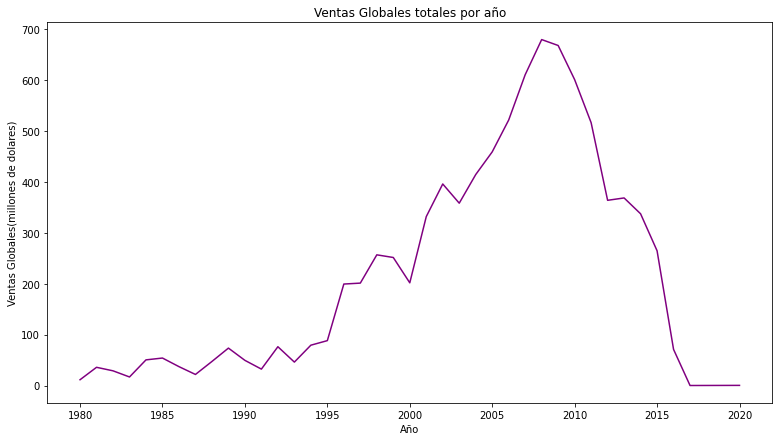

In [7]:
year= list(videojuegos.Year.unique())
global_sales=[]

for i in year:
    val=videojuegos[videojuegos.Year == i]
    x= val.Global_Sales.sum()
    global_sales.append(x)

d1 = pd.DataFrame({'Year':year, 'Global_Sales':global_sales})

fig,ax= plt.subplots(figsize=(13,7))
ax.plot(d1['Year'], d1['Global_Sales'], color='purple')
ax.set_xlabel('Año')
ax.set_ylabel('Ventas Globales(millones de dolares)')
ax.set_title('Ventas Globales totales por año')
plt.show()


Como podemos ver en la gráfica, hay un aumento paulatino y estable de las ventas de videojuegos hasta el año 1995. A partir de este año las ventas de videojuegos empiezan a ascender bruscamente, alcanzando su pico entre el año 2005 y 2010. Esto coincide con el auge de Playstation 2, Xbox y Nintendo DS, consolas míticas que hicieron mucho por la insdustria. Durante estos años también lanzan al mercado las nuevas consolas de Sony y Microsoft lo que hace que la industria de los videojuegos este en alza unos años más. Sin embargo, a partir de 2010 podemos observar una caida en picado debido posiblemente a la crisis económica y la aparición de forma cada vez más común de videojuegos "Free to play" como es el caso de League Of Leguends o Fortnite. 

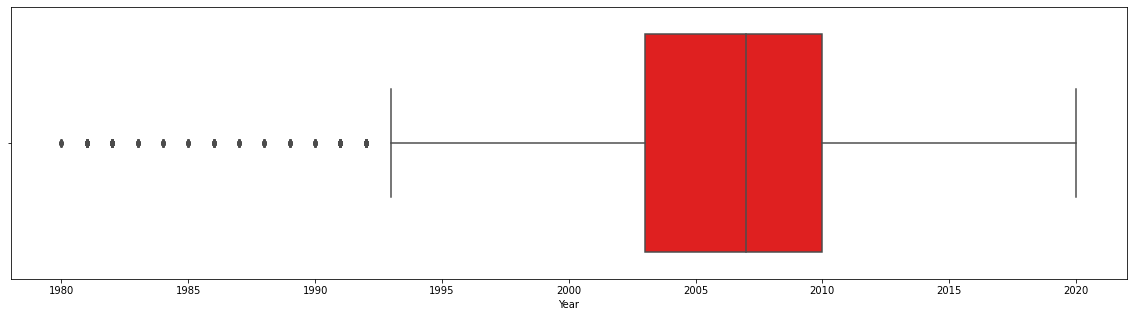

In [8]:
plt.figure(figsize=(20,5))
sns.boxplot(videojuegos["Year"], color="red");

En este otro gráfico se puede apreciar aún con más detalle como el grueso de las ventas se concentran sobre todo entre el año 2002-2003 hasta el año 2010, en el que empiezan a decaer de manera paulatina. Alcanza su cúspide en el año entre el año 2007 y 2008

También es importante tener en cuenta la cantidad de videojuegos lanzados al mercado cada año.

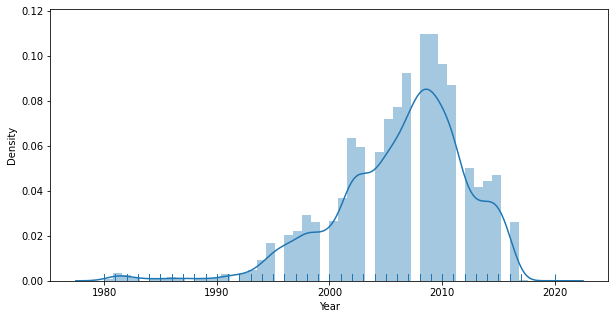

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(videojuegos["Year"],
            rug=True);

Como podemos ver en este gráfico, la cantidad de videojuegos lanzados entre el año 2000 y el año 2010 es mayor a la del resto de años juntos. 

Esto se debe principalmente a dos cosas: 
1. El auge de la industria durante esta época.
2. La tradición que surge durante estos años de adaptar cualquier obra cinematográfica a la industria de los videojuegos. 

Esta última tendencia irá desapareciendo a partir del año 2008, probablemente debido a la crisis económica y a la aparición de juegos "Free to play" como hemos dicho anteriormente. 

## Ventas según las diferentes zonas geográficas 

Continuando con nuestra indagación, vamos a ver cómo se han desarrollado las ventas de las diferentes zonas geográficas. Este conjuto de datos recoge 4 tipos ventas, las ventas de Norte América, las de Europa, las de Japón y las del resto de países.

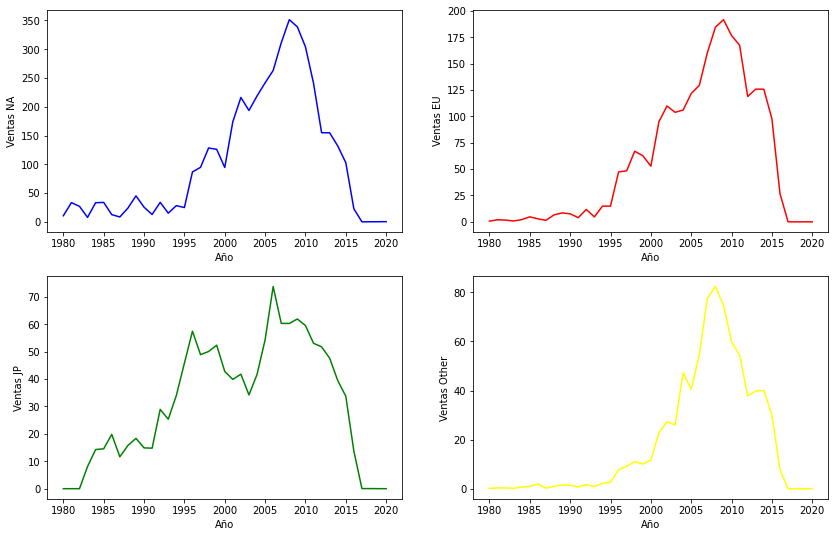

In [10]:
year_per_sales=list(videojuegos.Year.unique())
na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]



for i in year_per_sales:
    val=videojuegos[videojuegos.Year==i]
    na_sales.append(val.NA_Sales.sum())
    eu_sales.append(val.EU_Sales.sum())
    jp_sales.append(val.JP_Sales.sum())
    other_sales.append(val.Other_Sales.sum())

d2= pd.DataFrame({'Year': year_per_sales, 'NA_Sales': na_sales, 'EU_Sales': eu_sales, 'JP_Sales': jp_sales, 'Other_Sales': other_sales})
    
fig, ax = plt.subplots(2,2,figsize=(14,9))
ax[0,0].plot(d2['Year'], d2['NA_Sales'], color='blue')
ax[0,1].plot(d2['Year'], d2['EU_Sales'], color='red')
ax[1,0].plot(d2['Year'], d2['JP_Sales'], color='green')
ax[1,1].plot(d2['Year'], d2['Other_Sales'], color='yellow')

ax[0,0].set_xlabel('Año')
ax[0,1].set_xlabel('Año')
ax[1,0].set_xlabel('Año')
ax[1,1].set_xlabel('Año')

ax[0,0].set_ylabel('Ventas NA')
ax[0,1].set_ylabel('Ventas EU')
ax[1,0].set_ylabel('Ventas JP')
ax[1,1].set_ylabel('Ventas Other')


plt.show()

Como se puede apreciar en las diferentes gráficas, la mayoría de las ventas se registran en la zona de Norte América, seguido de Europa, el resto de países del mundo y Japón, siendo el 2006 el año donde se registran las mayores niveles de ventas. A partir de ese año, las ventas empiezan a disminuir, siendo la zona de Norte América la mayor afectada entre el 2012-2013, donde se puede ver una caída aproximada de 200 millones de dólares.

# Ventas de Videojuegos en base a los géneros de los mismos

Otro dato que nos puede resultar de gran ayuda es visualizar que género de videojuego se vende más o menos dependiendo de la consola donde se lanza al mercado. 

## Ventas por Géneros de Videojuegos en XBOX 360

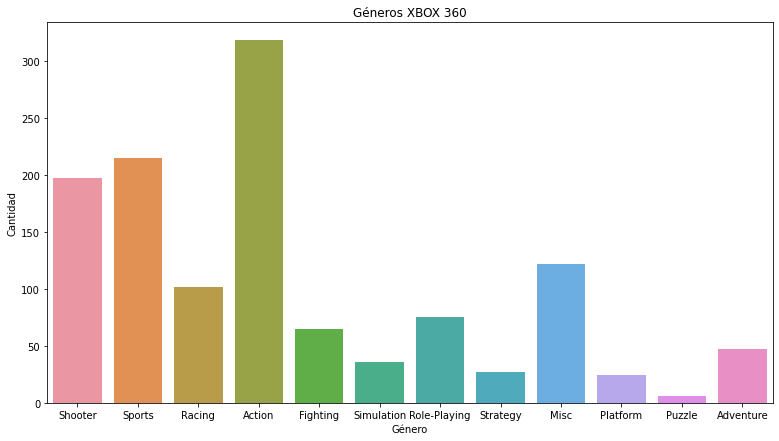

In [11]:
xbox_360 = videojuegos[(videojuegos.Platform == 'X360')]
xbox_360.Genre.unique()


plt.figure(figsize=(13,7))
sns.countplot(x='Genre', data=xbox_360)
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Géneros XBOX 360')
plt.show()

Como podemos observar el rey indiscutible de las ventas en XBOX360 es el género de acción, seguido por los videojuegos de deportes y éste último seguido muy de cerca por los shooters. 

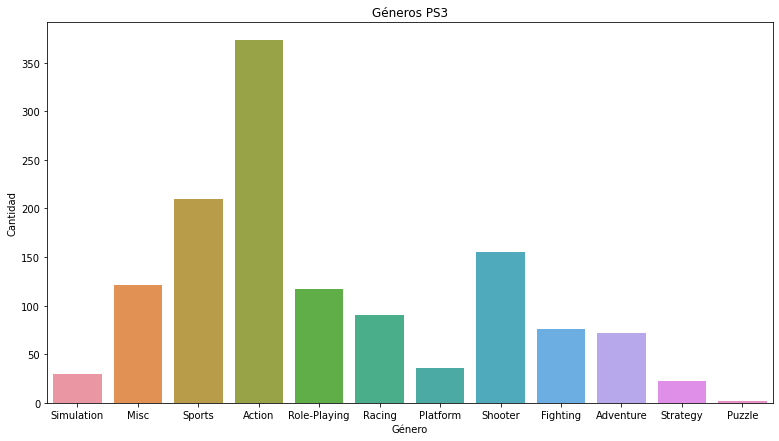

In [12]:
ps4 = videojuegos[(videojuegos.Platform == 'PS3')]
ps4.Genre.unique()

plt.figure(figsize=(13,7))
sns.countplot(x='Genre', data=ps4)
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Géneros PS3')
plt.show()

En PS3 vemos que el género de acción sigue siendo también muy el rey indiscutible, pero vemos que los videojuegos shooter venden bastante menos que en XBOX360. Aquí podemos teorizar acerca de como podría afectar el mando de cada consola a la jugabilidad en diferentes estilos de juegos, como la sensibilidad del joystick a la hora de disparar en los juegos shooter, por ejemplo. 

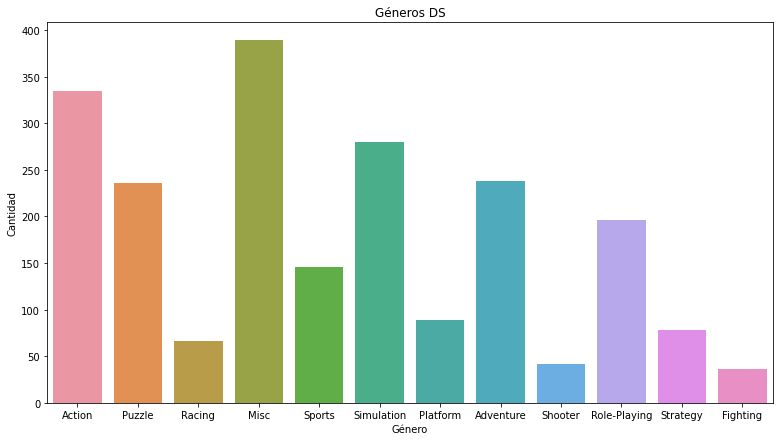

In [13]:
ds = videojuegos[(videojuegos.Platform == 'DS')]
ds.Genre.unique()

plt.figure(figsize=(13,7))
sns.countplot(x='Genre', data=ds)
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Géneros DS')
plt.show()

Como siempre, las consolas de nintendo van a otra cosa y encontramos que el género mas vendido es el "Misc" que se puede entender como videojuegos variados que no pertenecen a un género definido. A éste le siguen los juegos de acción y de simulación y aventura. 

Es destacable observr que, mientras en las otras dos consolas, el shooter era un género bastante vendido, en Nintendo no cosecha apenas ventas este género. 

Como hemos podido observar aquí, el mercado al que van dirigido los videojuegos que se lanzan en las consolas de Sony y Microsoft es otro completamente distinto al que va dirigido la consola de Nintendo.

# Comparativa ventas globales entre Xbox 360 y PS3

Vamos a pasar a ver una comparativa de las ventas globales entre diferentes consolas, remarcando las ventas en cada una de las regiones. 

[Text(0.5, 0, 'Platforma'),
 Text(0, 0.5, 'Ventas'),
 Text(0.5, 1.0, 'Ventas totales por zonas geográficas para XBOX 360 y PS3')]

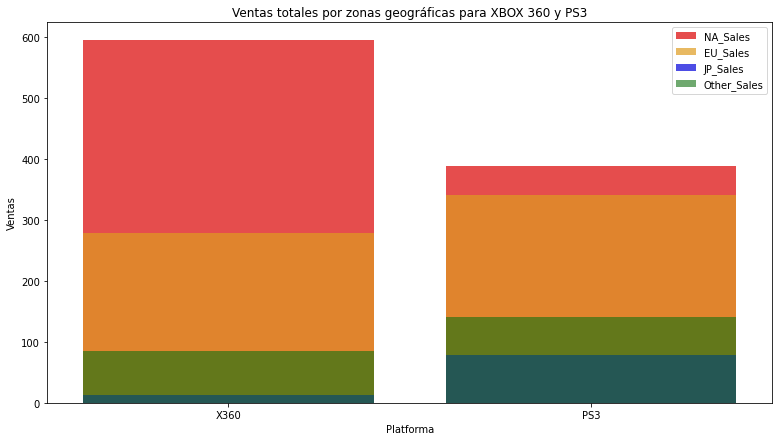

In [14]:

x_vs_p = videojuegos [videojuegos["Platform"].isin(['X360', 'PS3'])]

platform=list(x_vs_p.Platform.unique())
na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]

for i in platform:
    val=x_vs_p[x_vs_p.Platform==i]
    na_sales.append(val.NA_Sales.sum())
    eu_sales.append(val.EU_Sales.sum())
    jp_sales.append(val.JP_Sales.sum())
    other_sales.append(val.Other_Sales.sum())
    
    
f,ax = plt.subplots(figsize = (13,7))
sns.barplot(x=platform,y=na_sales,color= 'red',alpha =0.8,label='NA_Sales' )
sns.barplot(x=platform,y=eu_sales,color='orange',alpha = 0.7,label='EU_Sales')
sns.barplot(x=platform,y=jp_sales,color='blue',alpha = 0.8,label='JP_Sales')
sns.barplot(x=platform,y=other_sales,color='green',alpha = 0.6,label='Other_Sales')


ax.legend(loc='upper right',frameon = True)
ax.set(xlabel='Platforma', ylabel='Ventas',title = "Ventas totales por zonas geográficas para XBOX 360 y PS3")

En primer lugar vemos una clara ganadora entre PS3 y Xbox360, donde las ventas generadas por la segunda en Norte América es lo que da la victoria a la consola de Microsoft. 

Pero, ¿que pasa si sumamos a la ecuación la consola de nintendo que compitió con estas otras dos consolas?

[Text(0.5, 0, 'Platforma'),
 Text(0, 0.5, 'Ventas'),
 Text(0.5, 1.0, 'Ventas totales por zonas geográficas para XBOX 360 y PS3')]

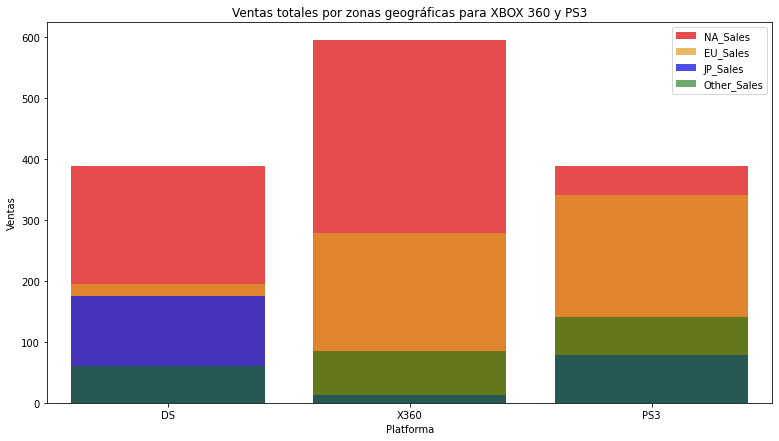

In [15]:
x_vs_p = videojuegos [videojuegos["Platform"].isin(['X360', 'PS3','DS'])]


platform=list(x_vs_p.Platform.unique())
na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]

for i in platform:
    val=x_vs_p[x_vs_p.Platform==i]
    na_sales.append(val.NA_Sales.sum())
    eu_sales.append(val.EU_Sales.sum())
    jp_sales.append(val.JP_Sales.sum())
    other_sales.append(val.Other_Sales.sum())
    
    
f,ax = plt.subplots(figsize = (13,7))
sns.barplot(x=platform,y=na_sales,color= 'red',alpha =0.8,label='NA_Sales' )
sns.barplot(x=platform,y=eu_sales,color='orange',alpha = 0.7,label='EU_Sales')
sns.barplot(x=platform,y=jp_sales,color='blue',alpha = 0.8,label='JP_Sales')
sns.barplot(x=platform,y=other_sales,color='green',alpha = 0.6,label='Other_Sales')


ax.legend(loc='upper right',frameon = True)
ax.set(xlabel='Platforma', ylabel='Ventas',title = "Ventas totales por zonas geográficas para XBOX 360 y PS3")

Pues encontramos que la consola de Nintendo practicamente igualó a la consola de Sony en ventas, destacando su gran éxito en Japón, aunque también destacando su estripotoso fracaso en Europa. 

También me parece un dato a destacar el hecho de las pocas ventas de Xbox360 en Japón. Esto es debido a la gran tradición y leyes que existen en Japón y que promueven la compra de productos nipones. 

# Comparativa ventas globales entre Xbox One y PS4 


¿Y que pasará en cuanto a ventas si pasamos a la siguiente generación de consolas?

[Text(0.5, 0, 'Platforma'),
 Text(0, 0.5, 'Ventas'),
 Text(0.5, 1.0, 'Ventas totales por zonas geográficas para XBOX ONE y PS4')]

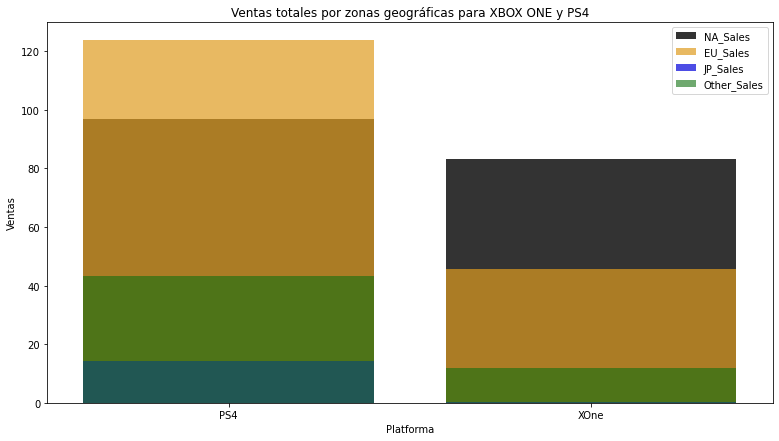

In [16]:
x_vs_p = videojuegos [videojuegos["Platform"].isin(['XOne', 'PS4'])]


platform=list(x_vs_p.Platform.unique())
na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]

for i in platform:
    val=x_vs_p[x_vs_p.Platform==i]
    na_sales.append(val.NA_Sales.sum())
    eu_sales.append(val.EU_Sales.sum())
    jp_sales.append(val.JP_Sales.sum())
    other_sales.append(val.Other_Sales.sum())
    
    
f,ax = plt.subplots(figsize = (13,7))
sns.barplot(x=platform,y=na_sales,color= 'black',alpha =0.8,label='NA_Sales' )
sns.barplot(x=platform,y=eu_sales,color='orange',alpha = 0.7,label='EU_Sales')
sns.barplot(x=platform,y=jp_sales,color='blue',alpha = 0.8,label='JP_Sales')
sns.barplot(x=platform,y=other_sales,color='green',alpha = 0.6,label='Other_Sales')


ax.legend(loc='upper right',frameon = True)
ax.set(xlabel='Platforma', ylabel='Ventas',title = "Ventas totales por zonas geográficas para XBOX ONE y PS4")

Pues lo que encontramos es una completa remontado por parte de la consola de Sony sobre la consola de Microsoft. Destacando mucho las ventas conseguidas por Sony en Norte America y Europa, que han aumentado mucho con respecto a su consola predecesora. También es destacable la practicamente nula venta de consolas de Microsoft en territorio nipón. 

¿Y que pasa si volvemos a sumar a la ecuación la consola de nintendo que pertenece a esta generación? 

[Text(0.5, 0, 'Platforma'),
 Text(0, 0.5, 'Ventas'),
 Text(0.5, 1.0, 'Ventas totales por zonas geográficas para XBOX ONE y PS4')]

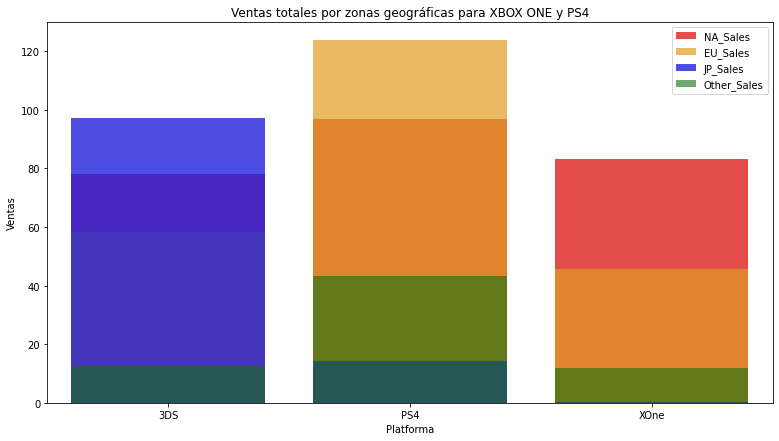

In [17]:
x_vs_p = videojuegos [videojuegos["Platform"].isin(['XOne', 'PS4','3DS'])]


platform=list(x_vs_p.Platform.unique())
na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]

for i in platform:
    val=x_vs_p[x_vs_p.Platform==i]
    na_sales.append(val.NA_Sales.sum())
    eu_sales.append(val.EU_Sales.sum())
    jp_sales.append(val.JP_Sales.sum())
    other_sales.append(val.Other_Sales.sum())
    
    
f,ax = plt.subplots(figsize = (13,7))
sns.barplot(x=platform,y=na_sales,color= 'red',alpha =0.8,label='NA_Sales' )
sns.barplot(x=platform,y=eu_sales,color='orange',alpha = 0.7,label='EU_Sales')
sns.barplot(x=platform,y=jp_sales,color='blue',alpha = 0.8,label='JP_Sales')
sns.barplot(x=platform,y=other_sales,color='green',alpha = 0.6,label='Other_Sales')


ax.legend(loc='upper right',frameon = True)
ax.set(xlabel='Platforma', ylabel='Ventas',title = "Ventas totales por zonas geográficas para XBOX ONE y PS4")

Pues nos llevamos a una sorpresa bastante grande cuando descubrimos que la consola de Nintendo en este caso ha llegado incluso a superar a la consola de Microsoft, lo que nos indica el declive de la consola de Microsoft. 

También me parece remarcable el hecho de que Nintendo 3DS ha conseguido superar a XboxONE sin vender prácticamente en América del norte, solo con sus ventas en Japón y Europa. 

También otro dato que me parece importante y a destacar teniendo en cuenta todas las gráficas de las diferentes consolas que hemos manejado, es la caida de ventas tan descomunales que podemos observar entre una generación y otra.

Mientras que en la generación de PS3, Xbox360 y DS manejamos un volumen de ventas de hasta 600 millones de dolares, en la posterior generación de consolas el volumen de ventas que manejamos llega al pico en 120 millones de dolares lo que es solo un 20% con respecto a las ventas totales en la generación anterior. Esto coincide con la gráfica que vimos al principio y donde veíamos la caida de ventas globales que se produce a partir del año 2010.

# FIN 

* Datos encontrados en la web de Kaggle 
* Análisis Exploratorio de Datos realizado por José Enrique Vera Rodríguez